In [18]:
#importing Libraries.
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading & Viewing The Dataset.
df = pd.read_csv('UberDataset.csv')

In [3]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
#Performing Exploratory Data Analysis by Handling Unclean Data.
df.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [5]:
#Due to the high number of NULL values in the Purpose Column. instead of dropping them, we fill them as UnSpecified.
df[['PURPOSE']] = df[['PURPOSE']].fillna('UnSpecified')

In [6]:
#Dropping The Rest of NULL Values
df = df.dropna()

In [7]:
#No Missing Values
df.isna().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [8]:
#We Convert Start & End Dates to the Same Date Format to Ensure Consistency
def convert_to_dd_mm_yyyy(date_str):
    try:
        date = pd.to_datetime(date_str, format='%d-%m-%Y %H:%M')
    except ValueError:
        date = pd.to_datetime(date_str, format='%m/%d/%Y %H:%M')
    return date.strftime('%d-%m-%Y %H:%M')

for col in ['START_DATE', 'END_DATE']:
    df[col] = df[col].apply(convert_to_dd_mm_yyyy)

C:\Users\Abd El Rahman\AppData\Local\Temp\ipykernel_14544\2576341899.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(convert_to_dd_mm_yyyy)


In [9]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,UnSpecified
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,31-12-2016 01:07,31-12-2016 01:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,31-12-2016 13:24,31-12-2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,31-12-2016 15:03,31-12-2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,31-12-2016 21:32,31-12-2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [10]:
#Identifying Statistics of Numerical Values in the Dataset
df[['MILES']].describe()

,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [11]:
#Locating Most Common Trip Purposes (Visualized in Tableau)
df['PURPOSE'].value_counts()

PURPOSE
UnSpecified        502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

In [12]:
#Filtering The Start Dates into Morning, Afternoon, Evening & Night to Identify Trip Milage Trends Using Time of Day & Purpose
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='%d-%m-%Y %H:%M')
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TIME_OF_DAY'] = df['START_DATE'].dt.hour.apply(get_time_of_day)

C:\Users\Abd El Rahman\AppData\Local\Temp\ipykernel_14544\2214588164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='%d-%m-%Y %H:%M')
C:\Users\Abd El Rahman\AppData\Local\Temp\ipykernel_14544\2214588164.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TIME_OF_DAY'] = df['START_DATE'].dt.hour.apply(get_time_of_day)


In [13]:
#Visualization is found in Tableau
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_OF_DAY
0,2016-01-01 21:11:00,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Night
1,2016-02-01 01:25:00,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,UnSpecified,Night
2,2016-02-01 20:25:00,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Evening
3,2016-05-01 17:31:00,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Evening
4,2016-06-01 14:42:00,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Afternoon
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,31-12-2016 01:14,Business,Kar?chi,Kar?chi,0.7,Meeting,Night
1151,2016-12-31 13:24:00,31-12-2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,Afternoon
1152,2016-12-31 15:03:00,31-12-2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,Afternoon
1153,2016-12-31 21:32:00,31-12-2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,Night


In [14]:
#Filtering to Get Only Category & Miles for Comparative Overview
df2 = df[['CATEGORY', 'MILES']]

In [15]:
df2

,CATEGORY,MILES
0,Business,5.1
1,Business,5.0
2,Business,4.8
3,Business,4.7
4,Business,63.7
...,...,...
1150,Business,0.7
1151,Business,3.9
1152,Business,16.2
1153,Business,6.4


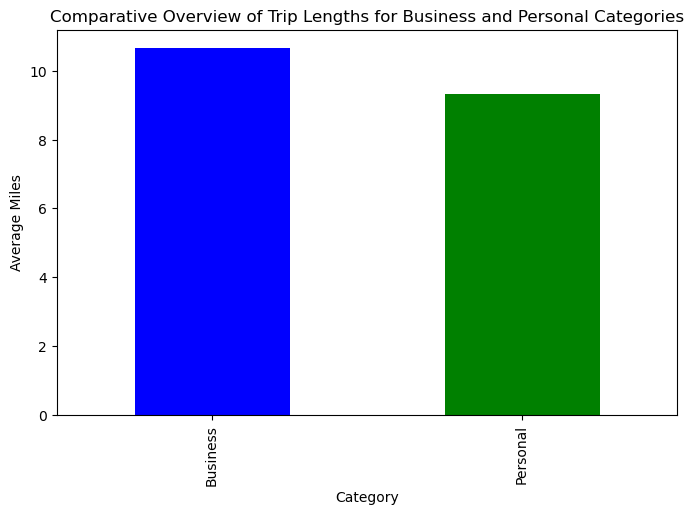

In [16]:
category_miles = df.groupby('CATEGORY')['MILES'].mean()

category_miles.plot(kind='bar', color=['blue', 'green'], figsize=(8, 5))

plt.xlabel('Category')
plt.ylabel('Average Miles')
plt.title('Comparative Overview of Trip Lengths for Business and Personal Categories')
plt.show()

In [17]:
df.to_excel('Task1.xlsx')